In this Assignment the MNIST dataset was downloaded from Github through the following link:  https://git-disl.github.io/GTDLBench/datasets/mnist_datasets/

In [4]:
# code for importing data

import numpy as np

def load_data():
    def _load_data(filename, num_samples, offset):
        with open(filename, 'rb') as f:
            f.read(offset)
            data = np.frombuffer(f.read(num_samples * 28 * 28), dtype=np.uint8)
        return data.reshape(num_samples, 28*28)

    def _load_labels(filename, num_samples, offset):
        with open(filename, 'rb') as f:
            f.read(offset)
            labels = np.frombuffer(f.read(num_samples), dtype=np.uint8)
        return labels.reshape(num_samples, 1)

    train_images = _load_data('train-images.idx3-ubyte', 60000, 16)
    train_labels = _load_labels('train-labels.idx1-ubyte', 60000, 8)
    test_images = _load_data('t10k-images.idx3-ubyte', 10000, 16)
    test_labels = _load_labels('t10k-labels.idx1-ubyte', 10000, 8)

    return train_images, train_labels, test_images, test_labels

# Load the data
train_images, train_labels, test_images, test_labels = load_data()

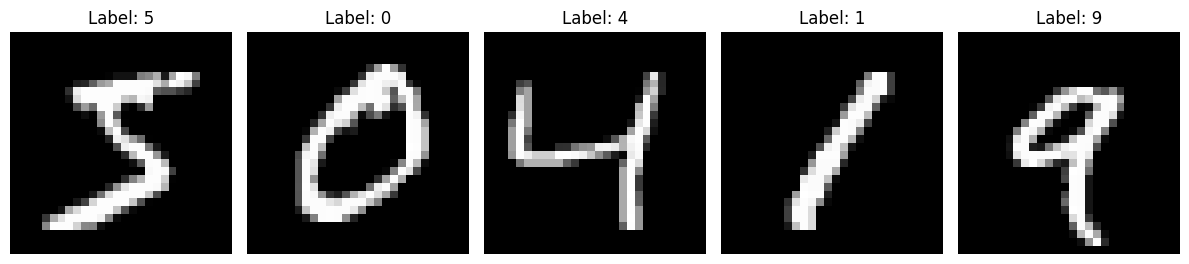

In [5]:
# codes for displaying a few images and their corresponding labels
import matplotlib.pyplot as plt
num_images_to_display = 5
fig, axes = plt.subplots(1, num_images_to_display, figsize=(12, 3))
for i in range(num_images_to_display):
    axes[i].imshow(train_images[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Label: {train_labels[i][0]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

Data vectorization, also known as feature vectorization, is the process of converting raw data into a numerical representation in the form of vectors or arrays. Data vectorization is a crucial step in preparing data for machine learning tasks. It converts raw data into a numerical format that algorithms can understand, enabling them to learn patterns, make predictions, and perform various data analysis tasks effectively.

In [6]:
# Data representation/vectorization
train_images_vectorized = train_images.reshape(train_images.shape[0], -1)
test_images_vectorized = test_images.reshape(test_images.shape[0], -1)

Data normalization, also known as data scaling or feature scaling, is a preprocessing technique used to bring data into a standardized range. It involves transforming the values of different features or variables in a dataset to a common scale, typically between 0 and 1 or with a mean of 0 and a standard deviation of 1. The goal of data normalization is to ensure that the features have similar scales and distributions, which can improve the performance and stability of machine learning algorithms.

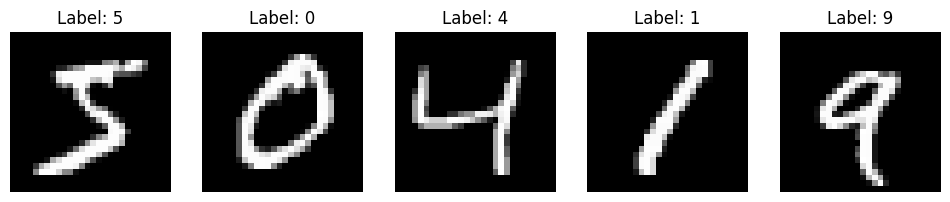

In [7]:
# Data normalization, if needed
train_images_normalized = train_images_vectorized / 255.0
test_images_normalized = test_images_vectorized / 255.0

def display_images(images, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(12, 3))
    for i in range(num_images):
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"Label: {labels[i][0]}")
        axes[i].axis('off')
    plt.show()

display_images(train_images_normalized, train_labels)

In [8]:
#codes for data spliiting in different ratios:
from sklearn.model_selection import train_test_split
def split_data(train_images, train_labels, test_images, test_labels, test_size):
    # Concatenate train and test sets for splitting
    images = np.concatenate((train_images, test_images))
    labels = np.concatenate((train_labels, test_labels))

    # Split the data into training and testing sets
    train_images, test_images, train_labels, test_labels = train_test_split(
        images, labels, test_size=test_size, random_state=42, stratify=labels)

    return train_images, train_labels, test_images, test_labels

# Load the data
train_images, train_labels, test_images, test_labels = load_data()

# Ratios for splitting data
ratios = [(0.8, 0.2), (0.5, 0.5), (0.2, 0.8), (0.01, 0.99)]

for ratio in ratios:
    print(f"\nSplitting data with ratio {int(ratio[0]*100)}-{int(ratio[1]*100)}")
    train_images_split, train_labels_split, test_images_split, test_labels_split = split_data(
        train_images, train_labels, test_images, test_labels, test_size=ratio[1])
    print(f"Number of training samples: {len(train_images_split)}")
    print(f"Number of testing samples: {len(test_images_split)}")


Splitting data with ratio 80-20
Number of training samples: 56000
Number of testing samples: 14000

Splitting data with ratio 50-50
Number of training samples: 35000
Number of testing samples: 35000

Splitting data with ratio 20-80
Number of training samples: 14000
Number of testing samples: 56000

Splitting data with ratio 1-99
Number of training samples: 700
Number of testing samples: 69300


In [9]:
#codes for model selection and  training:
#In this assignment,four models were used which are logistic regression,decision tree,random forest and support vector machine.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def train_model(X_train, y_train, X_test, model):
    # Function to train a model and return its accuracy
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Load the data
train_images, train_labels, _, _ = load_data()

# Data splitting and model training for different ratios
ratios = [(0.8, 0.2), (0.5, 0.5), (0.2, 0.8), (0.01, 0.99)]

for train_ratio, test_ratio in ratios:
    print(f"Training ratio: {train_ratio}, Testing ratio: {test_ratio}")
    X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=test_ratio, random_state=42)

    models = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Support Vector Machine": SVC()
    }

Training ratio: 0.8, Testing ratio: 0.2
Training ratio: 0.5, Testing ratio: 0.5
Training ratio: 0.2, Testing ratio: 0.8
Training ratio: 0.01, Testing ratio: 0.99


In [10]:
#codes for model evaluation:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


def evaluate_model(y_true, y_pred):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)
    return accuracy, precision, recall, f1, cm

# Load the data
train_images, train_labels, _, _ = load_data()

# Data splitting and model training for different ratios and algorithms
ratios = [(0.8, 0.2), (0.5, 0.5), (0.2, 0.8), (0.01, 0.99)]

for train_ratio, test_ratio in ratios:
    print(f"Training ratio: {train_ratio}, Testing ratio: {test_ratio}")
    X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=test_ratio, random_state=42)

    models = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Support Vector Machine": SVC()
    }

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train.ravel())

        # Predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy, precision, recall, f1, cm = evaluate_model(y_test, y_pred)
        print(f"Model: {model_name}")
        print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
        print("Confusion Matrix:")
        print(cm)
        print()

Training ratio: 0.8, Testing ratio: 0.2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.9223, Precision: 0.9221, Recall: 0.9223, F1-score: 0.9221
Confusion Matrix:
[[1139    0    6    3    4    4    5    4    8    2]
 [   0 1283    8    6    2    3    1    2   13    4]
 [   1   18 1054   14   13    5   18   17   29    5]
 [   4    8   36 1090    1   32    2    9   22   15]
 [   4    2    5    2 1108    3    9    4    7   32]
 [  15    5   14   39    9  961   11    4   38    8]
 [  11    0   15    1    9   14 1120    2    5    0]
 [   5    7   15    9   10    2    0 1209    6   36]
 [  10   13   14   31    9   32   10    4 1028    9]
 [   5    4    5   14   28   10    0   39   14 1075]]

Model: Decision Tree
Accuracy: 0.8643, Precision: 0.8640, Recall: 0.8643, F1-score: 0.8641
Confusion Matrix:
[[1066    1   20    9    5   18   17   10   14   15]
 [   0 1270    4   11    3    8    9    4   11    2]
 [  14   16  998   25   22   11   10   20   43   15]
 [  13   14   31 1016    7   59   10   13   28   28]
 [   2    6   16    4 1019    8 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.9137, Precision: 0.9135, Recall: 0.9137, F1-score: 0.9135
Confusion Matrix:
[[2834    1   13    5   13   25   25    9   26    5]
 [   0 3236   21   15    5   11    2    4   27    8]
 [  19   28 2602   49   30   12   54   44   59   23]
 [  11   11   84 2733    2  100   11   26   64   35]
 [   7   13   20    3 2704    7   36   11   19  110]
 [  37   13   32  113   23 2366   42    8   98   35]
 [  20    2   28    5   27   43 2879    7   10    1]
 [   8   13   43   21   34    4    0 2901    8  126]
 [  20   65   47   87   18   96   34    9 2446   34]
 [  16   14   10   36   78   17    0   80   24 2710]]

Model: Decision Tree
Accuracy: 0.8493, Precision: 0.8490, Recall: 0.8493, F1-score: 0.8491
Confusion Matrix:
[[2675    1   39   39   17   47   57   12   36   33]
 [   3 3149   28   25   16   18   12   25   45    8]
 [  39   29 2408   74   46   42   60   70  114   38]
 [  23   20   96 2493   17  170   34   45  112   67]
 [  24   28   43   18 2490   26 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.8857, Precision: 0.8851, Recall: 0.8857, F1-score: 0.8853
Confusion Matrix:
[[4540    1   36   19   12   37   44   12   39   11]
 [   2 5180   30   35    8   24    7   15   49    5]
 [  43   54 4130  134   40   28   86   87  106   34]
 [  25   33  164 4261    9  204   17   35  155   63]
 [  14   17   31   11 4235   22   72   24   47  230]
 [  99   23   47  227   47 3471  125   21  227   68]
 [  55    7   76    8   61   75 4389    3   30    7]
 [  29   20   67   60   64    9    3 4482   14  259]
 [  40  101  146  205   37  188   51   33 3754   92]
 [  24   21   30   73  199   51    5  227   63 4070]]

Model: Decision Tree
Accuracy: 0.8160, Precision: 0.8151, Recall: 0.8160, F1-score: 0.8154
Confusion Matrix:
[[4202   15  103   66   32   98   62   53   74   46]
 [   6 4981   62   66   44   30   32   34   80   20]
 [ 147   99 3576  194   86  102  166  143  152   77]
 [  50   85  191 3815   63  240   53   94  226  149]
 [  31   64   78   51 3793   52 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.8302, Precision: 0.8295, Recall: 0.8302, F1-score: 0.8290
Confusion Matrix:
[[5553    0   63   35    6  138   22    7   29   14]
 [   2 6494   29   28   11   23   31   17   28   12]
 [ 108   81 4816  179   52   26  176  116  307   34]
 [  70   43  226 4813   34  354   79   45  294  107]
 [  51   28  128   11 4763   39  185   45   40  503]
 [ 145   85  135  413  126 3692  253   20  356  145]
 [ 173   25  178   15  105   53 5225   23   56    3]
 [  74   78  131  103  169  103    6 4975   53  513]
 [  42  264  178  272  148  290   87   34 4322  146]
 [  64   46  142  141  361   56   26  226  170 4659]]

Model: Decision Tree
Accuracy: 0.6157, Precision: 0.6156, Recall: 0.6157, F1-score: 0.6133
Confusion Matrix:
[[5004   11  175  156   75  116   89   26  167   48]
 [  10 5527  411  102   48   95   90  111  274    7]
 [ 380  371 3265  237  303  214  334  170  568   53]
 [ 128  283  483 3032  220  534  247  168  741  229]
 [ 135  132  342  281 3207  120 